In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### problem statement

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city’s lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb’s operations in one of the world’s most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.


### Questions

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.

1) What are the different property types in the Dataset?

2) Which neighborhood group has the highest number of listings?

3) Which neighborhoods group have the highest average prices for Airbnb listings?

4) Is there a relationship between the construction year of property and price?

5) Who are the top 10 hosts by calculated host listing count?

6) Are hosts with verified identities more likely to receive positive reviews?

7) Is there a correlation between the price of a listing and its service fee?

8) What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

9) Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

### Data Wrangling

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [9]:
data=data = pd.read_csv("Documents/Airbnb_Open_Data.csv", index_col=0)
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_policy  

In [11]:
data[data.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,141.0,1.0,1.0,2021-11-14,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,130.0,3.0,38.0,2021-11-13,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,181.0,3.0,10.0,2021-11-13,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,118.0,30.0,38.0,2021-11-13,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,71.0,30.0,13.0,2021-11-13,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [12]:
df = data.drop_duplicates()
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [13]:
# Neighbourhood group was "brookIn" instead of "BrookIyn"
df[df["neighbourhood group"] == "Brookln"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


### Problems Identified within the Data

- 541 duplicated Records where found in the Data.

- Insufficient information were recorded for the house_rules and Licence columns.

- Dollar signs and commas recorded along with the values for price and service fee.

- The currency for price and service fee were not added to the column's titles.

- Missing values in some records

- Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.

- In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

- Some outliers were identified in the availability 365 column.



### Steps to be Taken for Data Cleaning

- Drop duplicated records.

- Drop house_rules and license columns with insufficient data.

- Remove all dollar signs in the price and service fee columns.

- Remove all commas from the price and service fee columns.

- Rename the price and service fee columns to include a dollar signs.

- Drop all records with missing values.

- Change all mismatched data types to the appropriate once.

- Correct the Spelling of 'brookln' to 'Brooklyn'

- Get rid of outliers in the 'availability 365' column data.

In [18]:
# drop duplicates records
df.drop_duplicates(inplace=True)

In [19]:
#Drop house_rules and license columns with insufficient data.
df.drop(["house_rules","license"],axis=1,inplace=True)

In [20]:
#Rename the price and service fee columns to include a dollar signs.
df.rename(columns={
    "price":"price_$",
    "service fee":"service_fee_$"
},inplace=True)

In [21]:
#drop all records with missing values
df.dropna(inplace=True)

In [22]:
#Change all mismatched data types to the appropriate once.
df["id"]=df["id"].astype(str)
df["host id"]=df["host id"].astype(str)
df["last review"]=pd.to_datetime(df["last review"])
df["Construction year"]=df["Construction year"].astype(int)

In [23]:
# correct the spelling of "brookIn" to "BrookIyn"
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = "Brooklyn"

In [24]:
# get rid of outliers  in the "avalibility 365" column data
df=df.drop(df[df["availability 365"] >500].index)

In [25]:
df.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

### EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset’s characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

In [29]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


**1 - what are the different property types in the Dataset?**

In [31]:
property_types=df["room type"].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


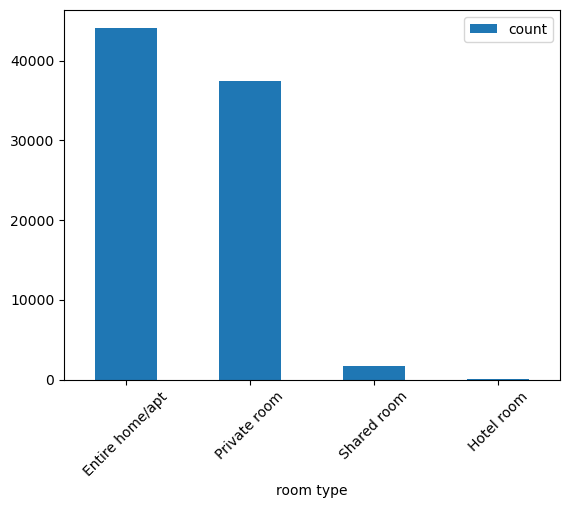

In [32]:
#room type count plotted on bar chart
property_types.plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

"The Airbnb open dataset reveals four distinct property or room types. These categories comprise;
- Entire home/apt
- Private room
- Shared room
- Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,161 occurrences, followed by Private room with 37,474 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively."

**2 -  Which neighborhood group has the highest number of listings?**

In [35]:
gf=df["neighbourhood group"].value_counts().reset_index()
gf

,neighbourhood group,count
0,Brooklyn,34622
1,Manhattan,34560
2,Queens,11124
3,Bronx,2267
4,Staten Island,816


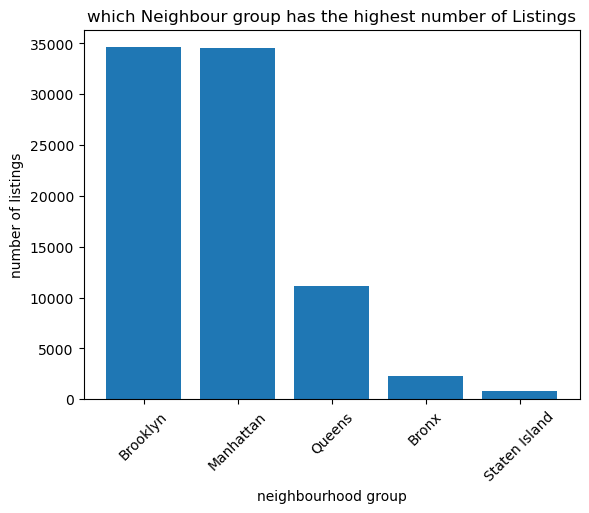

In [36]:
plt.bar(gf["neighbourhood group"],gf["count"])  # vertical bars
plt.xlabel("neighbourhood group")
plt.ylabel("number of listings")
plt.title("which Neighbour group has the highest number of Listings")
plt.xticks(rotation=45)
plt.show()

"The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barchart, Brooklyn has the highest number of listings with 34622, followed closely by Manhattan with 34560."

**3 - Which neighborhoods group have the highest average prices for Airbnb listings?**

In [39]:
pf=df.groupby("neighbourhood group")["price_$"].mean().reset_index().sort_values(by="price_$",ascending=False)
pf

,neighbourhood group,price_$
3,Queens,630.502517
0,Bronx,630.201147
1,Brooklyn,627.434261
2,Manhattan,623.435561
4,Staten Island,622.132353


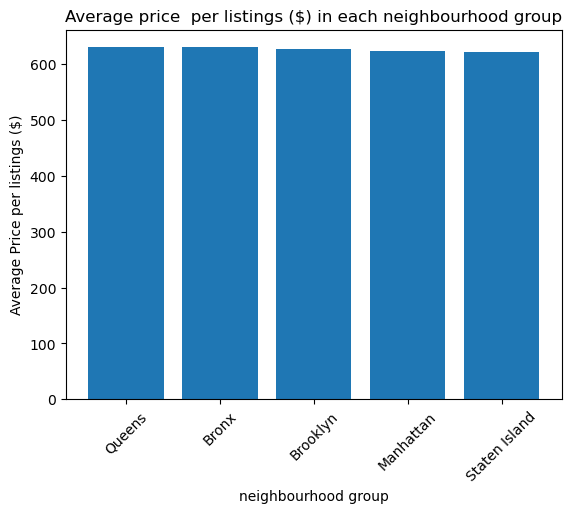

In [40]:
plt.bar(pf["neighbourhood group"],pf["price_$"])
plt.xlabel("neighbourhood group")
plt.ylabel("Average Price per listings ($)")
plt.title("Average price  per listings ($) in each neighbourhood group")
plt.xticks(rotation=45)
plt.show()

"Among the six identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.50 USD, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD."

**4 - Is there a relationship between the construction year of property and price?**

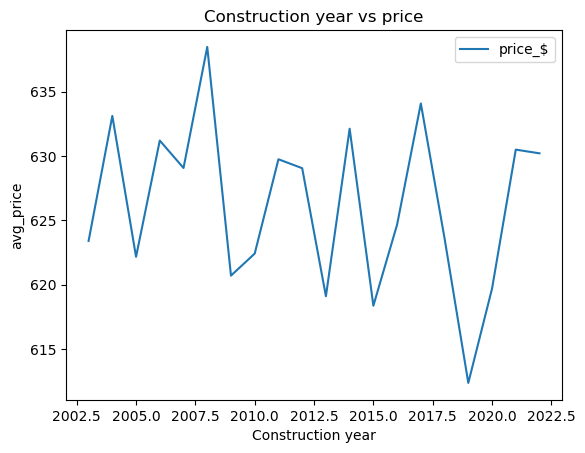

In [43]:
df.groupby('Construction year')['price_$'].mean().to_frame().plot()
plt.xlabel("Construction year")
plt.ylabel("avg_price")
plt.title("Construction year vs price")
plt.show()

**5 - Who are the top 10 hosts by calculated host listing count?**

In [45]:
top_10_host = df.groupby(df['host name'])['calculated host listings count'].sum().sort_values(ascending=False).to_frame().reset_index().iloc[:10]
top_10_host

,host name,calculated host listings count
0,Sonder (NYC),111921.0
1,Karen,42410.0
2,Jeniffer,31447.0
3,Blueground,21168.0
4,Kaz,17552.0
5,Corporate Housing,14833.0
6,Stay With Vibe,10260.0
7,Soya,10260.0
8,Kara,10092.0
9,Jeremy & Laura,10080.0


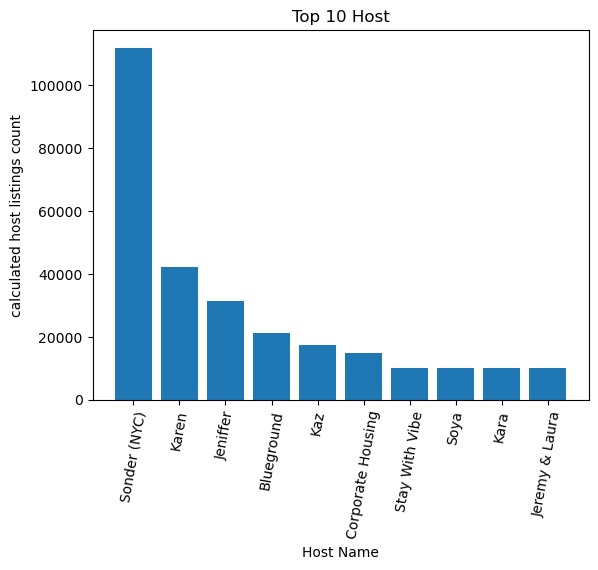

In [46]:
plt.bar(top_10_host['host name'],top_10_host['calculated host listings count'])
plt.xlabel("Host Name")
plt.ylabel("calculated host listings count")
plt.title("Top 10 Host")
plt.xticks(rotation=80)
plt.show()

**6 -  Are hosts with verified identities more likely to receive positive reviews?**

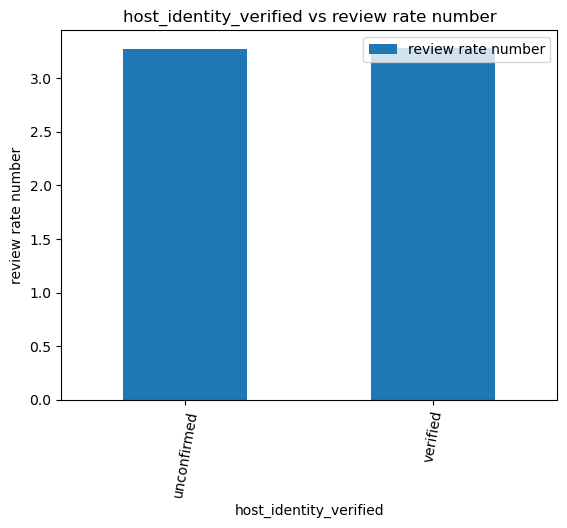

In [48]:
df.groupby(['host_identity_verified'])['review rate number'].mean().to_frame().reset_index().plot(kind='bar',x='host_identity_verified')
plt.xlabel('host_identity_verified')
plt.ylabel('review rate number')
plt.title('host_identity_verified vs review rate number')
plt.xticks(rotation=80)
plt.show()

as we can see there is slightly difference between unconfirmed and verified host

**7-  Is there a correlation between the price of a listing and its service fee?**

In [51]:
df['price_$'].corr(df['service_fee_$'])

0.9999909082976476

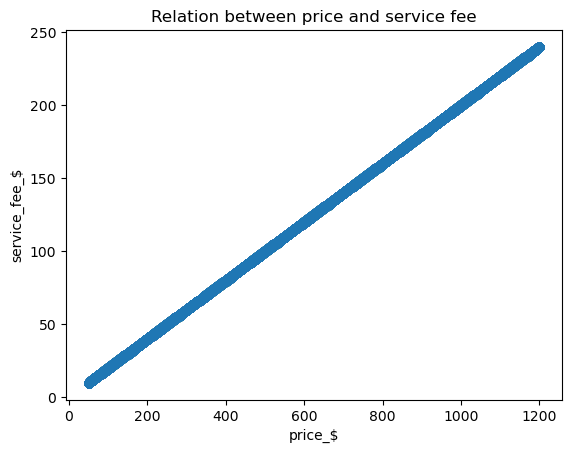

In [52]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$')
plt.title('Relation between price and service fee')
plt.show()

as we can see there is very similarities in  price and service fee

**8-  What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**

In [55]:
new = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame().reset_index()
new

,neighbourhood group,room type,review rate number
0,Bronx,Entire home/apt,3.381881
1,Bronx,Private room,3.305810
2,Bronx,Shared room,3.356322
3,Brooklyn,Entire home/apt,3.242491
4,Brooklyn,Hotel room,3.833333
5,Brooklyn,Private room,3.274773
6,Brooklyn,Shared room,3.323383
7,Manhattan,Entire home/apt,3.268846
8,Manhattan,Hotel room,3.500000
9,Manhattan,Private room,3.285431


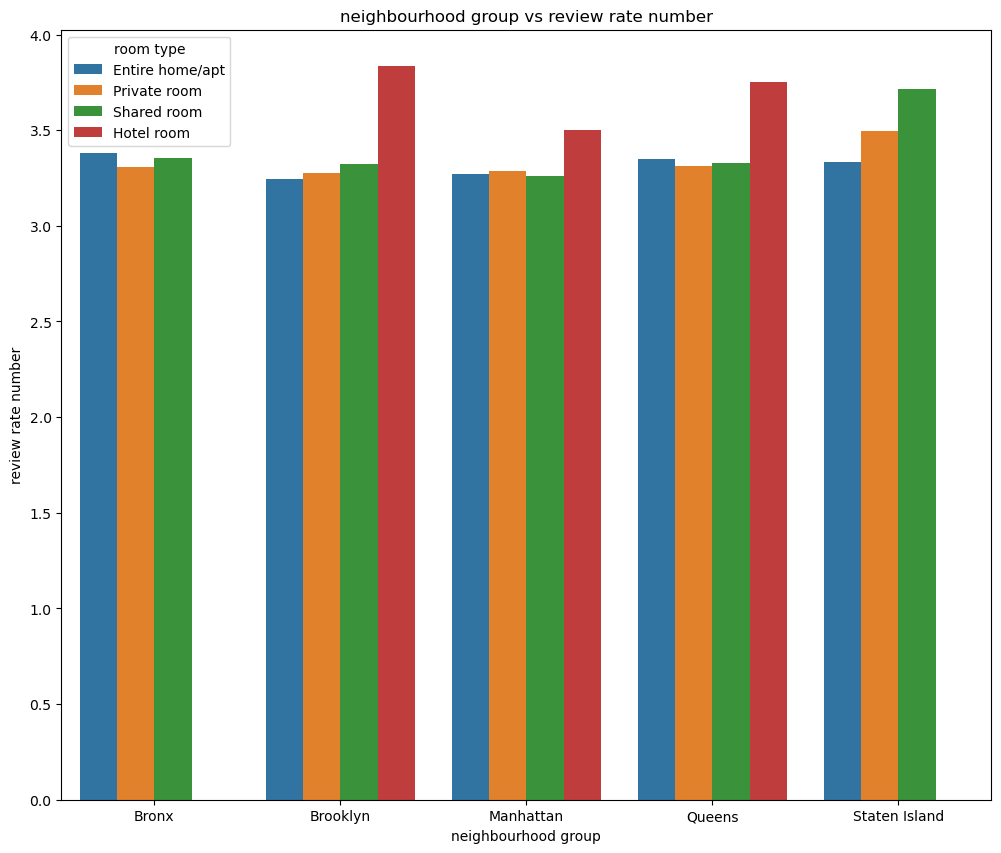

In [56]:
plt.figure(figsize = [12,10])
sns.barplot(new , x = 'neighbourhood group' , y = 'review rate number' , hue = 'room type')
plt.xlabel("neighbourhood group")
plt.ylabel("review rate number")
plt.title("neighbourhood group vs review rate number")
plt.show()

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens

**9 -Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**

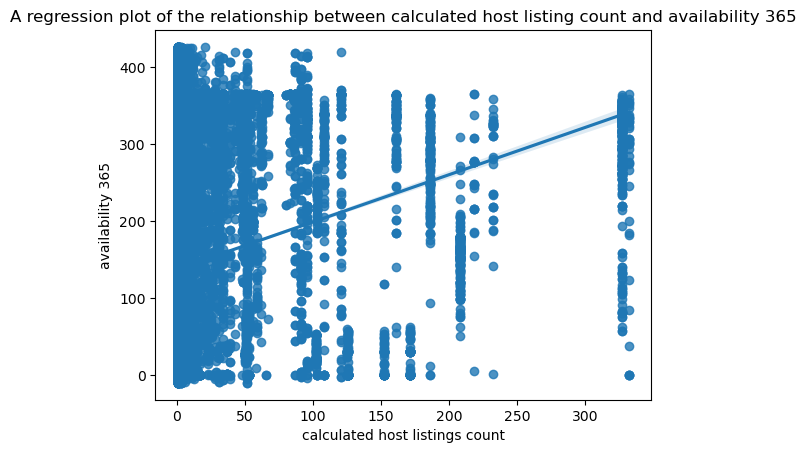

In [59]:
sns.regplot(df, x = 'calculated host listings count', y = "availability 365")
plt.xlabel('calculated host listings count')
plt.ylabel('availability 365')
plt.title("A regression plot of the relationship between calculated host listing count and availability 365")
plt.show()

In [60]:
df['calculated host listings count'].corr(df['availability 365'])

0.1359971471570338

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we’ve uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.